In [61]:
import pandas as pd
import seaborn as sns
import numpy as np
import statsmodels.api as sm

In [62]:
results = pd.read_csv('../data/results.csv')
season1 = results[results['SeasonID']==1]
startingXI = pd.read_csv('../data/startingXI.csv')
players = pd.read_csv('../data/players.csv')

results['Outcome'] = results.apply(
    lambda row: 'HomeWin' if row['HomeScore'] > row['AwayScore'] 
    else ('Draw' if row['HomeScore'] == row['AwayScore'] else 'AwayWin'), axis=1)
season1 = results[results['SeasonID']==1].copy()
season1['shot_ratio'] = season1['HomeShots'] / season1['AwayShots']

In [63]:
# What's the relationship between shots and results?
season1.groupby('Outcome').agg({'HomeShots' : np.mean,
                                'AwayShots': np.mean,
                                'shot_ratio': np.mean})

,HomeShots,AwayShots,shot_ratio
Outcome,,,
AwayWin,10.362550,15.513944,0.804726
Draw,14.132075,11.364780,1.506713
HomeWin,18.647399,9.063584,2.937790


<Axes: xlabel='shot_ratio', ylabel='Outcome'>

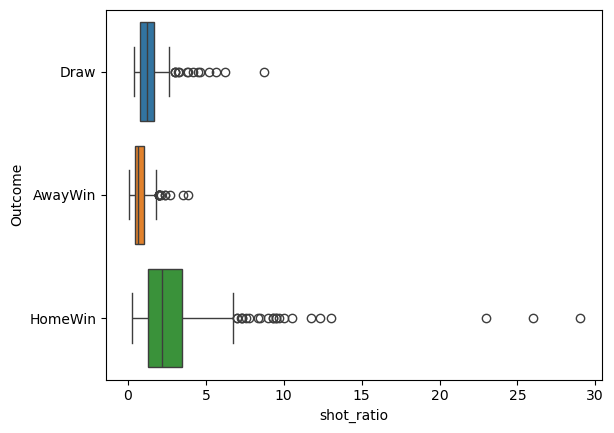

In [64]:
sns.boxplot(data=season1, y='Outcome', x='shot_ratio', hue='Outcome')

In [191]:
df_with_dummies = pd.get_dummies(match_stats, columns=['TeamID'], drop_first=True)
for column in df_with_dummies.columns:
    df_with_dummies[column] = pd.to_numeric(df_with_dummies[column], errors='coerce')
data = df_with_dummies.drop(['MatchID', 'Score', 'Outcome'], axis=1) * 1
X = sm.add_constant(np.array(data))
#X = match_stats['Shots']
Y = np.array(match_stats['Score'])

In [193]:
model = sm.OLS(Y, X).fit()

In [194]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.360
Model:                            OLS   Adj. R-squared:                  0.354
Method:                 Least Squares   F-statistic:                     60.27
Date:                Mon, 05 Aug 2024   Prob (F-statistic):          1.34e-265
Time:                        11:44:50   Log-Likelihood:                -4705.4
No. Observations:                3024   AIC:                             9469.
Df Residuals:                    2995   BIC:                             9643.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2408      0.124     -1.937      0.053      -0.484       0.003
x1             0.1297      0.004     32.660      0.000       0.122       0.137
x2            -0.0147      0.158     -0.093      0.926      -0.324       0.295
x3            -0.0573      0.157     -0.365      0.715      -0.366       0.251
x4             0.0815      0.158      0.517      0.605      -0.228       0.390
x5             0.0883      0.158      0.560      0.576      -0.221       0.398
x6             0.0958      0.157      0.610      0.542      -0.212       0.404
x7             0.1056      0.157      0.673      0.501      -0.202       0.413
x8             0.1699      0.158      1.077      0.281      -0.139       0.479
x9            -0.1369      0.157     -0.870      0.384      -0.445       0.172
x10           -0.0092      0.158     -0.058      0.954      -0.320       0.301
x11            0.1815      0.157      1.156      0.248      -0.126       0.489
x12           -0.0556      0.158     -0.353      0.724      -0.364       0.253
x13           -0.1444      0.157     -0.921      0.357      -0.452       0.163
x14           -0.0185      0.158     -0.118      0.906      -0.327       0.290
x15            0.2850      0.160      1.782      0.075      -0.029       0.599
x16           -0.0645      0.158     -0.409      0.682      -0.373       0.244
x17            0.1259      0.157      0.803      0.422      -0.182       0.433
x18            0.0068      0.157      0.043      0.965      -0.302       0.315
x19            0.0318      0.157      0.202      0.840      -0.277       0.340
x20            0.0330      0.159      0.208      0.835      -0.278       0.344
x21            0.0888      0.157      0.566      0.571      -0.219       0.396
x22           -0.0658      0.157     -0.420      0.675      -0.373       0.242
x23            0.2422      0.157      1.541      0.124      -0.066       0.550
x24            0.1443      0.157      0.920      0.358      -0.163       0.452
x25           -0.1732      0.158     -1.098      0.272      -0.483       0.136
x26           -0.1200      0.158     -0.760      0.448      -0.430       0.190
x27            0.0194      0.157      0.123      0.902      -0.289       0.328
x28           -0.1409      0.157     -0.898      0.369      -0.449       0.167
==============================================================================
Omnibus:                      223.719   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              312.252
Skew:                           0.621   Prob(JB):                     1.57e-68
Kurtosis:                       3.968   Cond. No.                         422.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is co

In [65]:
# Which players are always on the winning team, high shooting team, low conceding teams?

In [68]:
player_stats = startingXI.assign(Names=startingXI['StartingXI'].str.split(',')).explode('Names')
player_stats = player_stats.merge(players, left_on='Names', right_on='PlayerName')
player_stats = player_stats.drop(columns=['StartingXI', 'Names'])

In [86]:
# Player stats
player_stats = startingXI.assign(Names=startingXI['StartingXI'].str.split(',')).explode('Names')
player_stats = player_stats.merge(players, left_on='Names', right_on='PlayerName')
player_stats = player_stats.drop(columns=['StartingXI', 'Names'])
# Home Stats
home_stats = results[['MatchID', 'HomeTeamID', 'HomeScore', 'HomeShots', 'Outcome']].copy()
home_stats['Outcome'] = home_stats['Outcome'].map({'HomeWin': 'Win', 'AwayWin': 'Lose', 'Draw': 'Draw'})
home_stats = home_stats.rename(columns={'HomeTeamID': 'TeamID', 'HomeScore': 'Score', 'HomeShots': 'Shots'})
# Away Stats
away_stats = results[['MatchID', 'AwayTeamID', 'AwayScore', 'AwayShots', 'Outcome']].copy()
away_stats['Outcome'] = away_stats['Outcome'].map({'HomeWin': 'Lose', 'AwayWin': 'Win', 'Draw': 'Draw'})
away_stats = away_stats.rename(columns={'AwayTeamID': 'TeamID', 'AwayScore': 'Score', 'AwayShots': 'Shots'})
match_stats = pd.concat([home_stats, away_stats])
# Merge
player_stats =player_stats.merge(match_stats, on=['MatchID', 'TeamID'], how='left')

In [113]:
outcome_counts = player_stats.groupby(['PlayerName'])['Score'].count()
games_played = outcome_counts.reset_index().rename(columns={'Score': 'Games'})

In [149]:
result_pc = player_stats.groupby(['TeamID', 'PositionID','PlayerName', 'Outcome'])['Score'].count().reset_index()
result_pc = result_pc.rename(columns={'Score': 'Count'})
result_pc = result_pc.pivot(index=['TeamID', 'PositionID','PlayerName'], columns='Outcome', values='Count').reset_index()
result_pc = result_pc.merge(games_played)
result_pc[['Draw_pc', 'Lose_pc', 'Win_pc']] = result_pc[['Draw', 'Lose', 'Win']].div(result_pc['Games'], axis=0)
result_pc.sort_values('Win_pc', ascending=False).head(10)

,TeamID,PositionID,PlayerName,Draw,Lose,Win,Games,Draw_pc,Lose_pc,Win_pc
495,20,3,William Wilson,9,35,4,48,0.187500,0.729167,0.083333
485,20,2,Roger Rowan,6,38,4,48,0.125000,0.791667,0.083333
490,20,3,James Duncan,10,45,5,60,0.166667,0.750000,0.083333
486,20,2,Stacey Radabaugh,9,36,4,49,0.183673,0.734694,0.081633
479,20,1,Russel Wells,6,30,3,39,0.153846,0.769231,0.076923
500,20,4,Robert Morin,4,44,4,52,0.076923,0.846154,0.076923
496,20,4,Donald Birney,5,31,3,39,0.128205,0.794872,0.076923
649,26,4,Willie McCorkle,13,23,3,39,0.333333,0.589744,0.076923
487,20,2,William Kelly,5,33,3,41,0.121951,0.804878,0.073171
250,10,4,John Jones,7,24,2,33,0.212121,0.727273,0.060606
